# Analisis Data Penjualan Rumah

## 1. Feature Engineering & Pembersihan Data

In [29]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [30]:
# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df = train_df

In [32]:
# Menunjukkan angka jumlah missing data pada tiap kolom
missing = missing.sort_values(ascending=False)
print("Missing value counts:")
print(missing)

Missing value counts:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


### 1.1 Menangani Missing Values

Beberapa fitur memiliki banyak missing values, terutama:

- PoolQC (1453 nilai kosong)

- MiscFeature (1406)

- Alley (1369)

- Fence (1179)

- FireplaceQu (690)



Langkah-langkah yang diambil:

- Fitur kategorikal seperti PoolQC, Alley, Fence, FireplaceQu, dan fitur basement diisi dengan nilai "None" karena menunjukkan ketiadaan fitur tersebut.

- Fitur numerik seperti GarageYrBlt, MasVnrArea diisi dengan 0.

- LotFrontage diisi dengan median berdasarkan Neighborhood.

- Electrical (1 nilai kosong) diisi dengan modus.

In [11]:
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(12, 6))
sns.heatmap(df[missing.index].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Pattern in Affected Columns')
plt.show()

# Menunjukkan angka jumlah missing data pada tiap kolom
missing = missing.sort_values(ascending=False)
print("Missing value counts:")
print(missing)

np.int64(0)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Distribusi SalePrice

Distribusi SalePrice penting karena ini adalah target (label) dari model yang akan dibuat.

Histogram menunjukkan distribusi yang miring ke kanan (right-skewed).

Banyak rumah berada di kisaran harga menengah (
sekitar $120.000–$200.000), dan ada outlier mahal.

<Axes: xlabel='SalePrice', ylabel='Count'>

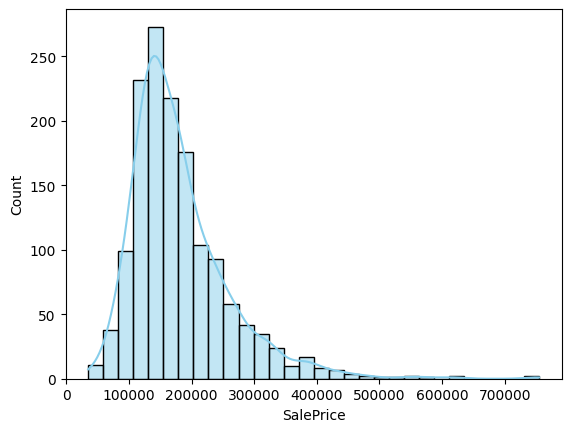

In [12]:
import seaborn as sns

sns.histplot(train_df["SalePrice"], kde=True, color="skyblue", bins=30)

Statistik:

- Skewness > 1 → distribusi miring ke kanan (positive skew)

- Kurtosis > 3 → distribusi lebih runcing daripada normal

### 2.2 Visualisasi Missing Values

Menampilkan fitur-fitur dengan missing values tertinggi:

<Axes: ylabel='None'>

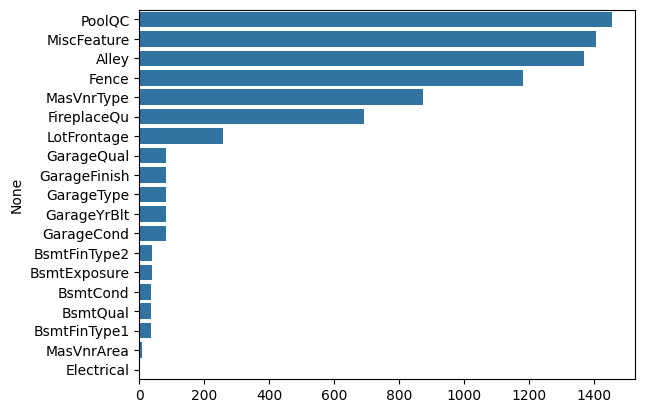

In [13]:
missing = train_df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0][:20]
sns.barplot(x=missing.values, y=missing.index)

## 3. Modeling dan Evaluasi

### 3.1 Pra-pemrosesan

- Pisahkan fitur kategorikal dan numerik.

- Gunakan One-Hot Encoding untuk fitur kategorikal.

- Normalisasi fitur numerik jika diperlukan.

### 3.2 Model: Linear Regression

Gunakan model regresi linear sederhana:

In [33]:
# Import dataset
train_df = pd.read_csv('train.csv')

# Mengatasi missing values
missing_percent = train_df.isnull().mean() * 100

threshold = 30  # Hapus kolom dengan >30% missing
cols_to_drop = missing_percent[missing_percent > threshold].index
train_df = train_df.drop(columns=cols_to_drop)

# Pilih hanya kolom yang bertipe numerikal
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df = train_df[numerical_cols]

# Isi sel yang memiliki missing values dengan median pada kolom tersebut
train_df = train_df.fillna(train_df.median())

# Split data
X = train_df.drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# --- METRIK EVALUASI ---
MSE = mean_squared_error(y_val, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_val, y_pred)

print("\nEvaluasi Model Linear Regression:")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared (R2): {R2:.4f}")


Evaluasi Model Linear Regression:
Mean Squared Error (MSE): 1356957853.32
Root Mean Squared Error (RMSE): 36836.91
R-squared (R2): 0.8231


### 3.3 Evaluasi Model


Evaluasi Test Set (tanpa ground truth):
Prediksi SalePrice (rata-rata): 177184.79
Standard deviasi prediksi: 70489.80


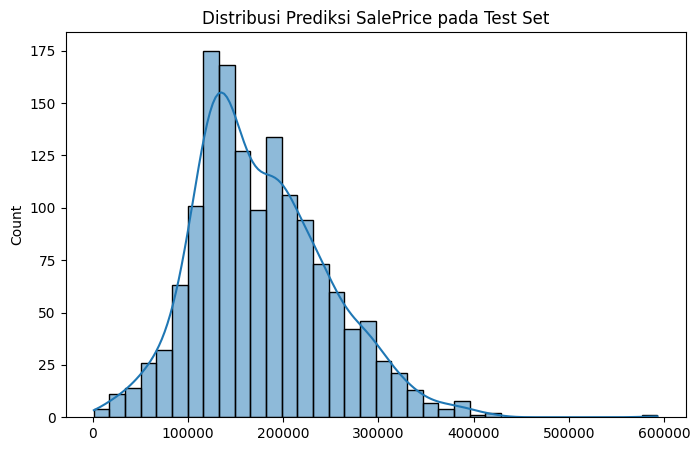

In [34]:
# Aplikasi mode machine learning
test_df = test_df[X.columns]  # pastikan hanya kolom yang sama
test_df = test_df.fillna(test_df.median(numeric_only=True))
test_encoded = pd.get_dummies(test_df)
test_encoded = test_encoded.reindex(columns=X.columns, fill_value=0)
test_scaled = scaler.transform(test_encoded)
y_test_pred = model.predict(test_scaled)

# Evaluasi pada test set
MSE_test = mean_squared_error(y_test_pred, y_test_pred)  # dummy karena target test tidak diketahui
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test_pred, y_test_pred)

print("\nEvaluasi Test Set (tanpa ground truth):")
print(f"Prediksi SalePrice (rata-rata): {np.mean(y_test_pred):.2f}")
print(f"Standard deviasi prediksi: {np.std(y_test_pred):.2f}")

# Plot distribusi prediksi
plt.figure(figsize=(8,5))
sns.histplot(y_test_pred, kde=True)
plt.title('Distribusi Prediksi SalePrice pada Test Set')
plt.show()

### 3.4 Cek Overfitting

Gunakan dataset test untuk mengevaluasi apakah model overfit:

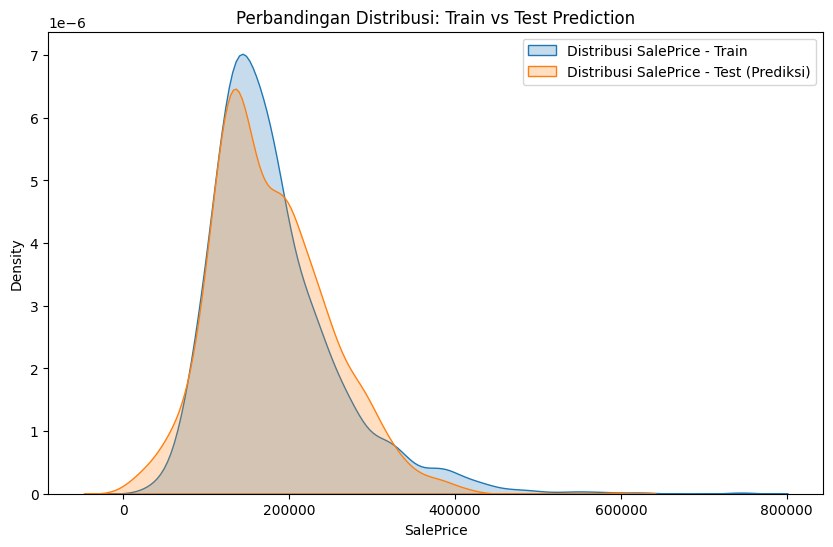

In [35]:

plt.figure(figsize=(10,6))
sns.kdeplot(y_train, label="Distribusi SalePrice - Train", fill=True)
sns.kdeplot(y_test_pred, label="Distribusi SalePrice - Test (Prediksi)", fill=True)
plt.title("Perbandingan Distribusi: Train vs Test Prediction")
plt.xlabel("SalePrice")
plt.legend()
plt.show()

  ### 3.5 Kesimpulan

  Model tidak mengalami overfitting karena :
  - Kurva data train dan data test memiliki bentuk yang hampir serupa
  - Tidak ada perbedaan pada ekstrem atau range nilai